In [1]:
import sys
import logging
import seaborn as sns
sys.path.append("../")
from experiments.scms import pomps_example_hard_for_contextual as environ, n_inter, n_context
from experiments.pomps_experiment import POMPSExperiment, MixedPolicyScope, CoBOExperiment
from experiments.causal_bo_experiment import CaBOExperiment, OptimizationObjective
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
environ.fcm.functors

{'Ct83': <pomps.fcm.Functor at 0x7fb8205a3dc0>,
 'Ct95': <pomps.fcm.Functor at 0x7fb8206e91f0>,
 'Ct125': <pomps.fcm.Functor at 0x7fb8206e9d30>,
 'Ct8': <pomps.fcm.Functor at 0x7fb82059f100>,
 'Ct80': <pomps.fcm.Functor at 0x7fb8205a3c70>,
 'Ct28': <pomps.fcm.Functor at 0x7fb82059f880>,
 'Ct31': <pomps.fcm.Functor at 0x7fb82059fa90>,
 'Ct99': <pomps.fcm.Functor at 0x7fb8206e9370>,
 'Ct7': <pomps.fcm.Functor at 0x7fb82059f0a0>,
 'Ct27': <pomps.fcm.Functor at 0x7fb82059f820>,
 'Xt21': <pomps.fcm.Functor at 0x7fb820705730>,
 'Ct113': <pomps.fcm.Functor at 0x7fb8206e98b0>,
 'Ct44': <pomps.fcm.Functor at 0x7fb82059ff10>,
 'Ct119': <pomps.fcm.Functor at 0x7fb8206e9af0>,
 'Ct24': <pomps.fcm.Functor at 0x7fb82059f430>,
 'Ct63': <pomps.fcm.Functor at 0x7fb8205a35b0>,
 'Ct26': <pomps.fcm.Functor at 0x7fb82059f7c0>,
 'Xt24': <pomps.fcm.Functor at 0x7fb8207058e0>,
 'Ct75': <pomps.fcm.Functor at 0x7fb8205a3a90>,
 'Xt4': <pomps.fcm.Functor at 0x7fb8206e9f10>,
 'Ct73': <pomps.fcm.Functor at 0x7fb8205

In [ ]:
smoke_test = False
n_iter = 300
experiment_name = 'test_cobo_imp'

exp = CoBOExperiment(environ.fcm, set(["X1", "X2"] + [f"Xt{i}" for i in range(n_inter)]),
                          set(["C1", "C0", "C2", "C3", "C4"] + [f"Ct{i}" for i in range(n_context)]),
                         environ.domain, "Y", [MixedPolicyScope(set())], debug=smoke_test,
                         n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name)
# exp = CoBOExperiment(environ.fcm, {"X1", "X2"}, {"C"},
#                          environ.domain, "Y", [MixedPolicyScope(set())], debug=smoke_test,
#                          n_iter=16 if smoke_test else n_iter, experiment_name=experiment_name)
# exp = CaBOExperiment(environ.fcm, {"C", "U1", "U2"},
#                          environ.domain, "Y", n_iter=16 if smoke_test else n_iter,
#                          experiment_name=experiment_name, objetive=OptimizationObjective.minimize)
exp.iterate({"smoke_test": smoke_test, "seed": 42}, smoke_test=True)

  0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt caught, calling on_optimization_end() to round things up


In [14]:
df = pd.DataFrame(exp._results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 1-df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

In [15]:
sns.scatterplot(data=df, x='C', y='X1', hue='index', style='MPS')

ValueError: Could not interpret value `C` for parameter `x`

In [16]:
sns.lineplot(df.MPS)

<AxesSubplot:ylabel='MPS'>

ValueError: Image size of 188617x413 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

<AxesSubplot:>

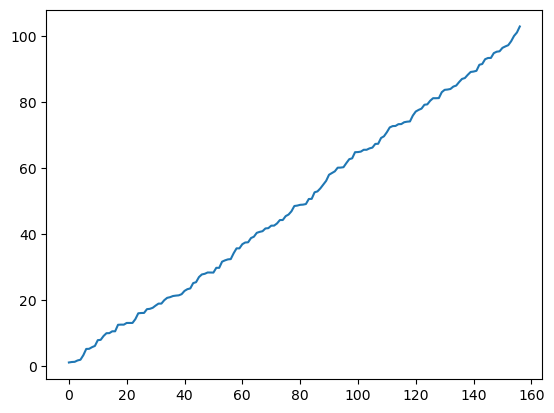

In [17]:
df.Cum_Regret.plot()

In [25]:
exp.

SyntaxError: invalid syntax (1779861486.py, line 1)